### A. Import Python Libraries

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

-----------------------

### B. Import dataset

In [3]:
pres_df = pd.read_csv(r'C:\Users\neric\Google Drive\School\Capstone Project 2\1976-2016-president-election-results.csv', header=0)
senate_df = pd.read_csv(r'C:\Users\neric\Google Drive\School\Capstone Project 2\1976-2018-senate-election-results.csv', header=0)
gov_df = pd.read_csv(r'C:\Users\neric\Google Drive\School\Capstone Project 2\1972-2019-gubernatorial-elections-results.csv', header=0)
voter_turn_df = pd.read_csv(r'C:\Users\neric\Google Drive\School\Capstone Project 2\1978-2016-voter-turnout-percentage.csv', header=0)

-----------------------

### C. Data Cleansing

In [4]:
## MAKE THE TABLES LOOK RIGHT ##
# Drop columns (via index) that we don't want from df_pres & df_senate
df_pres = pres_df.drop(pres_df.columns[[2,3,4,5,7,9,10,11]], axis=1)
df_senate = senate_df.drop(senate_df.columns[[2,3,4,5,7,8,9,10,12,13,14,15]], axis=1)
df_gover = gov_df.drop(gov_df.columns[[3]], axis=1)

# Convert the party column values to row values (transpose some columns), keep the other columns as columns
df_gover = pd.melt(gov_df, id_vars=['year','state','office'], value_vars=['democrat','republican','other1','other2','other3','other4','other5','other6','other7'])
# Reaname the newly created columns to something meaningful
df_gover = df_gover.sort_values(by=['year','state']).rename(columns={'variable': 'party', 'value': 'percentage'}).dropna()


## MAKE THE DATA LOOK RIGHT ##
# put the dataframes to tinker with in a list
dfs = [df_pres, df_senate, df_gover]

# Loop to edit all the dfs at once
for var in dfs:
    # Get the cells of the 'party' column via .loc that don't equal 'democrat' or 'republican'
    # and change those values to 'third party'
    var.loc[(var.party!= 'democrat') & (var.party != 'republican'), 'party'] = 'third party'
    

## MAKE SOME DIFFERENT VERSIONS OF DFs ##
# dt_all = All three elections aggreagted into a mean percentage of states for each party per year
concat = pd.concat(dfs)
foo = (
    concat.groupby(['year','party','state'])['percentage'].apply( # narrow down to 3 cols with percentanges summed*
    lambda x: [x.sum()] if x.name[2] == 'third party' else list(x)) # we actually only want 'third party' percentages summed.
    .explode() # Make the lists into rows
    .reset_index() #replace the index
)

foo["percentage"] = foo.percentage.astype(float)
df_all = foo.groupby(['year','party'], as_index=False)['percentage'].mean()

# vt = Aggreate the voter turout data, means of states 
vt = voter_turn_df.mean().reset_index().rename(columns={'index': 'year', 0: 'average percent'})
vt_pres = vt.iloc[0::2] # Filtered to just the presidental election years for use with the pres graph

-----------------------

### D. Issues Being Analyzed

I. Is there a correlation between voter turnout and party election victory?
  
    A. Does high voter turnout translate to more Democratic votes?
   

---------------------

### E. Insights

In comparing party success and voter turnout, it's fairly clear that there is no correlation between party wins and high voter turnout. In the graph directly below, if the there were correlation you would expect to see one party outperforming the other consistently on the high points of the black line representing voter turnout.   

In the interest of being thorough, below are graphs depecting the same voter turnout data against three elections: presidental, senatorial, and gubernatorial.

A correlation matrix was run against democratic and republican wins and losses, and turnout data, the correlation is 0.038. No correlation at all. 

#### Aggregate National Election Results (Presidental, Senatorial & Gubernatorial) vs Voter Turnout

Text(0, 0.5, 'voter turnout % of eligible population')

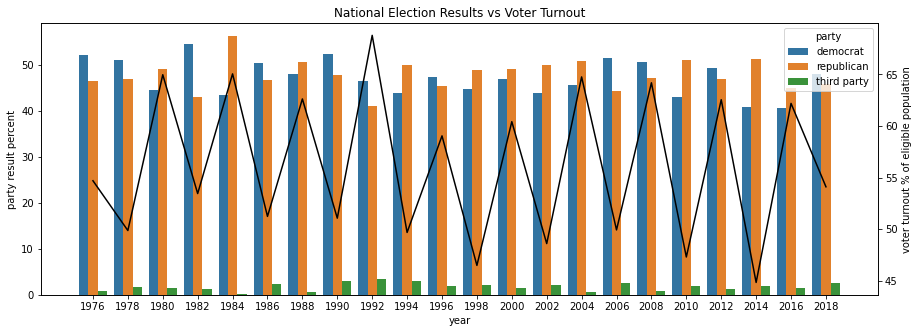

In [1173]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax1 = sns.barplot(x = 'year', y = 'percentage', hue = 'party', ci=0, data=df_all)
ax1.set_title('National Election Results vs Voter Turnout')
ax1.set_ylabel('party result percent')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='year', y='average percent', color = 'black', data=vt) 
ax2.set_ylabel('voter turnout % of eligible population')

#### Presidental, Senatorial & Gubernatorial Election Results vs Voter Turnout

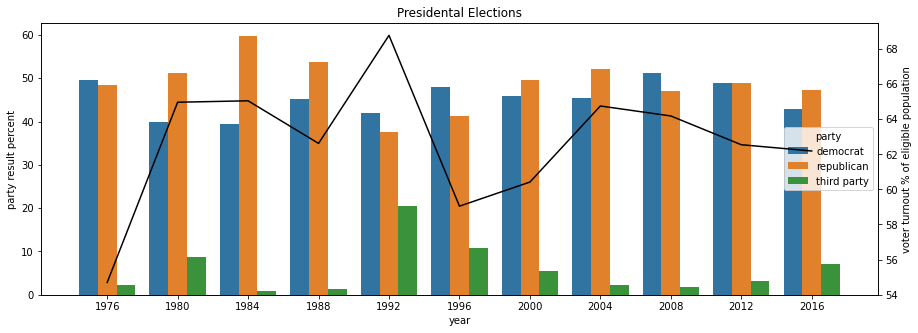

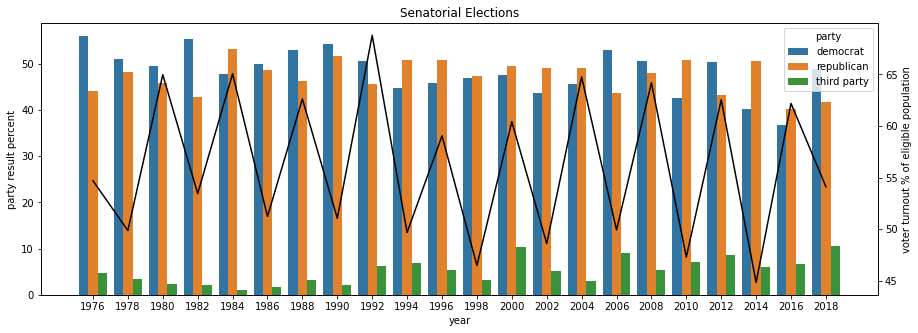

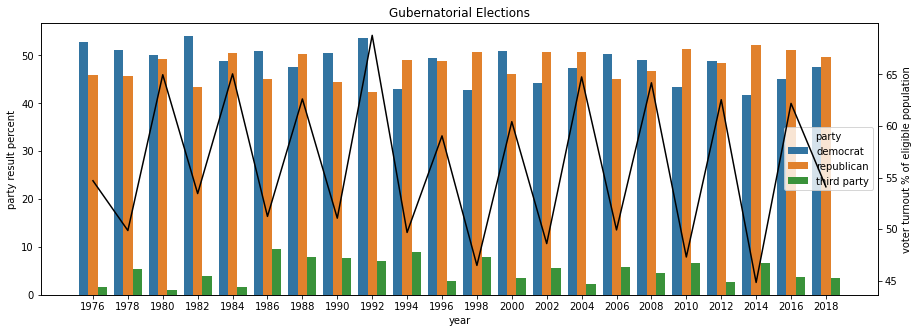

In [1174]:
# List of voter turnout dfs for use with different election graphs 
vt_df = [vt_pres, vt, vt]

# Set the title for each df chart
titles = ['Presidental Elections', 'Senatorial Elections', 'Gubernatorial Elections']

# Loop to create a chart for each df in the list = dfs
for var, v, t in zip(dfs, vt_df, titles):
    
    # group and order the data (SQL style):
    df = (
        var.groupby(['year', 'state', 'party'])['percentage'].apply( # narrow down to 3 cols with percentanges summed*
            lambda x: [x.sum()] if x.name[2] == 'third party' else list(x)) # we actually only want 'third party' percentages summed.
        .explode() # Make the lists into rows
        .reset_index() #replace the index
      )
    
    fig, ax1 = plt.subplots(figsize = (15,5))
    ax1 = sns.barplot(x = 'year', y = 'percentage', hue = 'party', ci=0, data=df)
    ax1.set_title(t)
    ax1.set_ylabel('party result percent')
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='year', y='average percent', color = 'black', data=v) 
    ax2.set_ylabel('voter turnout % of eligible population')
    
    
## Make a voter turnout live plot for an individual state:
#fig, ax = plt.subplots(figsize=(15,5))
#sns.lineplot(ax = ax, data = voter_turn_df['Alabama'], dashes=False)   

In [6]:
tf_df = pd.read_csv(r'C:\Users\neric\Google Drive\School\Capstone Project 2\py agg-turnout win-loss.csv', header=0)
tf_df.corr()

,year,democrat,republican,turnout percentage
year,1.000000,-0.316555,0.316555,-0.085462
democrat,-0.316555,1.000000,-1.000000,0.038815
republican,0.316555,-1.000000,1.000000,-0.038815
turnout percentage,-0.085462,0.038815,-0.038815,1.000000


In [7]:
tf_df

,year,democrat,republican,turnout percentage
0,1976,1,0,54.70
1,1978,1,0,49.87
2,1980,0,1,64.97
3,1982,1,0,53.45
4,1984,0,1,65.05
5,1986,1,0,51.24
6,1988,0,1,62.62
7,1990,1,0,51.07
8,1992,1,0,68.78
9,1994,0,1,49.69
